In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [42]:
# Lendo a Base de dados 
db = pd.read_csv('StudentsPerformance.csv')

In [43]:
# Dimenção
db.shape

(1000, 8)

In [44]:
# Head
db.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


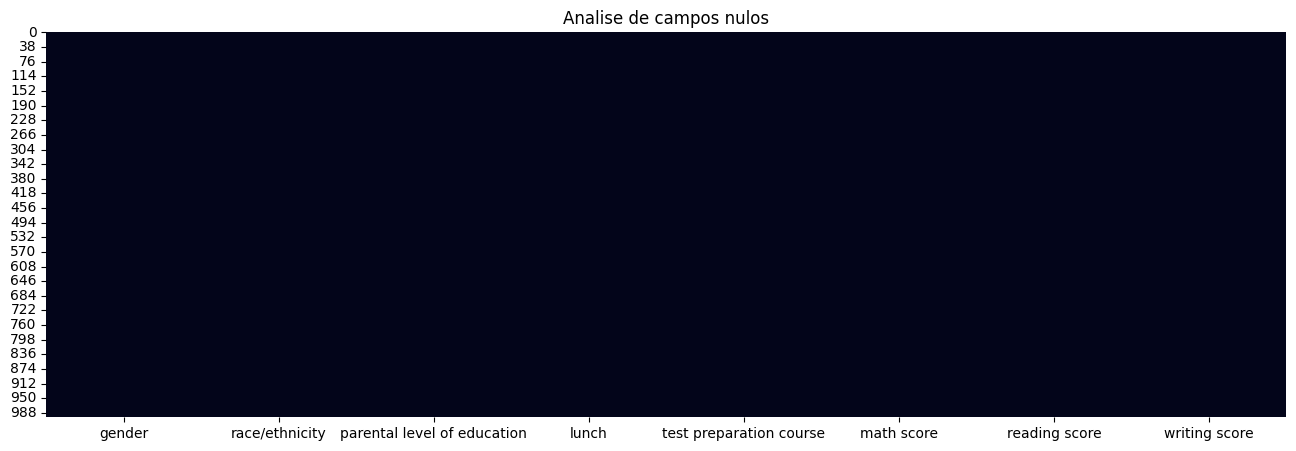

In [45]:
# Campos Nulos
Nulos = db.isnull()

plt.figure(figsize=(16,5))
plt.title('Analise de campos nulos')
sns.heatmap( Nulos, cbar=False);


In [46]:
# Campos Unicos
db.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [47]:
# Campos duplicados
db.duplicated().sum()

0

In [48]:
# Estatística
db.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Utilizando o describe, ja temos visão bem ampla de muitos dados como a média e o minimo e maximo de nota de cada materia.

In [49]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
db['gender'].value_counts(normalize=True) * 100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

Observamos que 51.8% dos alunos são do seco feminino e 48.2% são masculinos.

In [51]:
db['race/ethnicity'].value_counts(normalize=True) * 100

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

O grupo de etnia A é o menos incluso dentre os alunos.

In [52]:
db['parental level of education'].value_counts(normalize=True) * 100

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

O nivel de escolaridade dos pais dos alunos.

In [53]:
db['lunch'].value_counts(normalize=True) * 100

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

O tipo de lanche dos alunos, Padrão ou Grátis.

In [54]:
db['test preparation course'].value_counts(normalize=True) * 100

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

35,8% dos alunos fizeram o teste preparatorio para a prova.

## Analises

<Axes: xlabel='math score', ylabel='gender'>

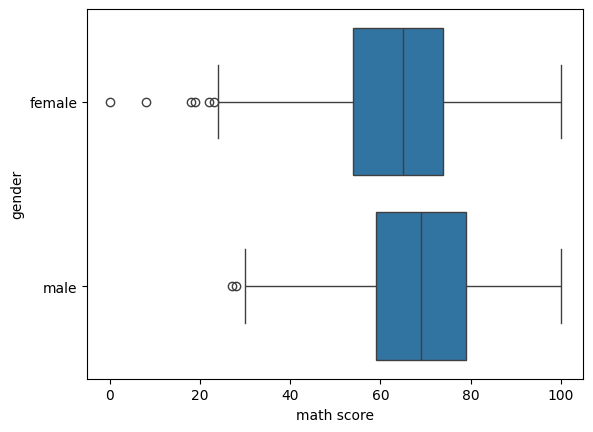

In [55]:
sns.boxplot(data=db, x='math score', y='gender')

A média das notas em matematica dos homens está maior que a das mulheres.

In [56]:
db.groupby( by=['gender']).describe()['math score'].reset_index

<bound method DataFrame.reset_index of         count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0>

Observamos que a menor nota dos homens foi 27, enquanto uma das mulheres zerou na prova, se tornando um outlier relevante, reduzindo assim sozinha um % da média das mulheres.

<Axes: xlabel='reading score', ylabel='gender'>

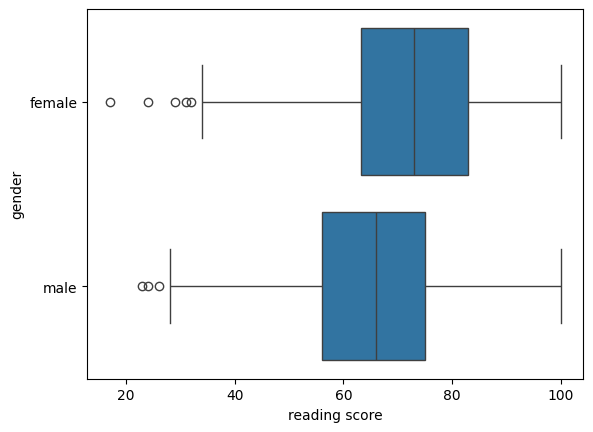

In [57]:
sns.boxplot(data=db, x='reading score', y='gender')

A média das notas em leitura das mulheres está maior que a dos homens.

In [58]:
db.groupby( by=['gender']).describe()['reading score'].reset_index

<bound method DataFrame.reset_index of         count       mean        std   min    25%   50%   75%    max
gender                                                             
female  518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0
male    482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0>

<Axes: xlabel='writing score', ylabel='gender'>

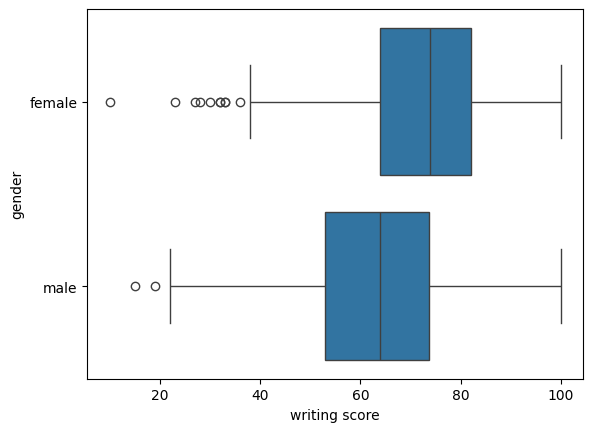

In [59]:
sns.boxplot(data=db, x='writing score', y='gender')

A média das notas em redação das mulheres está maior do que a dos homens.

In [60]:
db.groupby( by=['gender']).describe()['writing score'].reset_index

<bound method DataFrame.reset_index of         count       mean        std   min   25%   50%    75%    max
gender                                                             
female  518.0  72.467181  14.844842  10.0  64.0  74.0  82.00  100.0
male    482.0  63.311203  14.113832  15.0  53.0  64.0  73.75  100.0>

In [61]:
db.groupby( by=['gender']).describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

### Analises por etnia

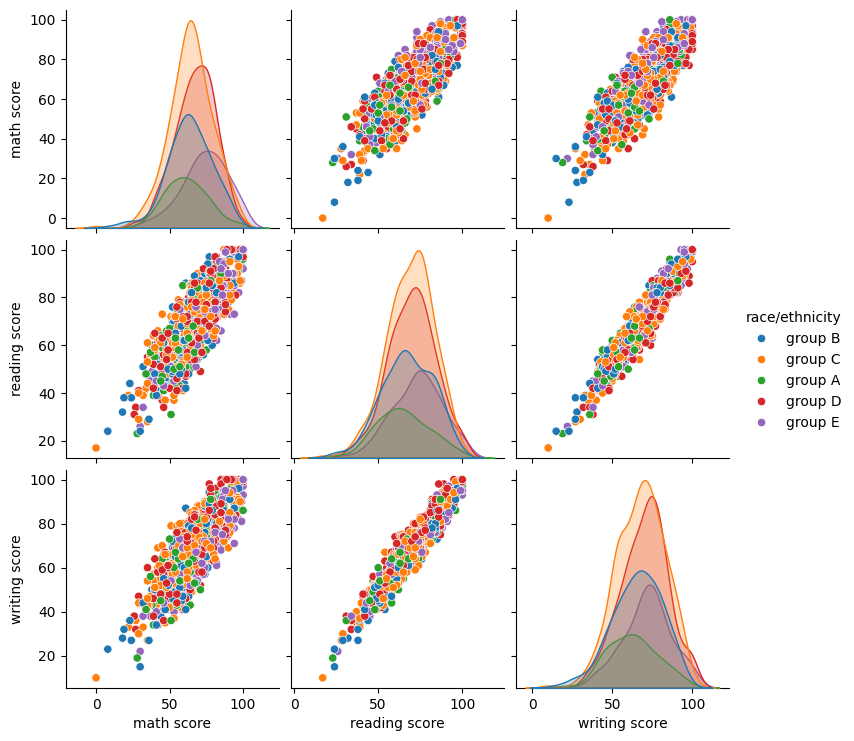

In [62]:
sns.pairplot(db, hue='race/ethnicity')

<Axes: xlabel='math score', ylabel='race/ethnicity'>

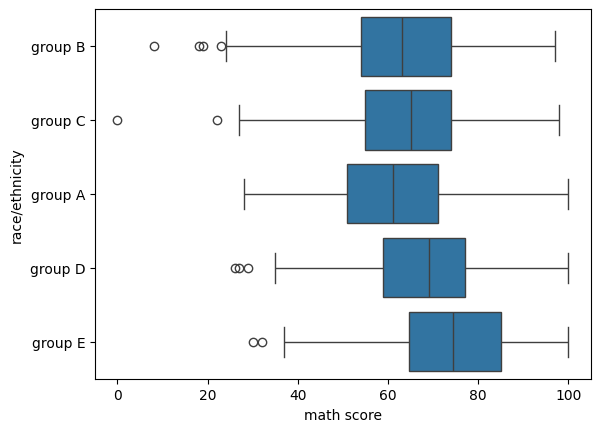

In [63]:
sns.boxplot(data=db, x='math score', y='race/ethnicity')

<Axes: xlabel='reading score', ylabel='race/ethnicity'>

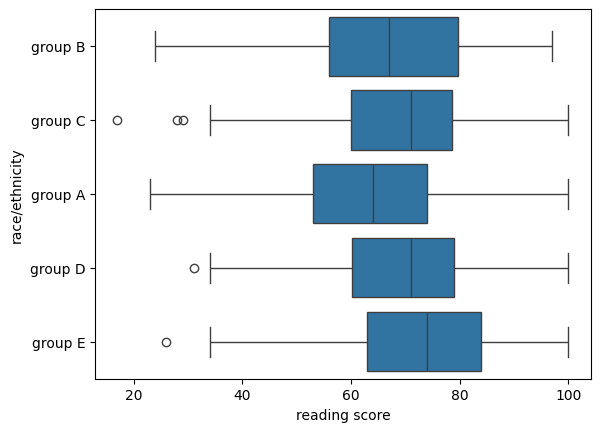

In [64]:
sns.boxplot(data=db, x='reading score', y='race/ethnicity')

<Axes: xlabel='writing score', ylabel='race/ethnicity'>

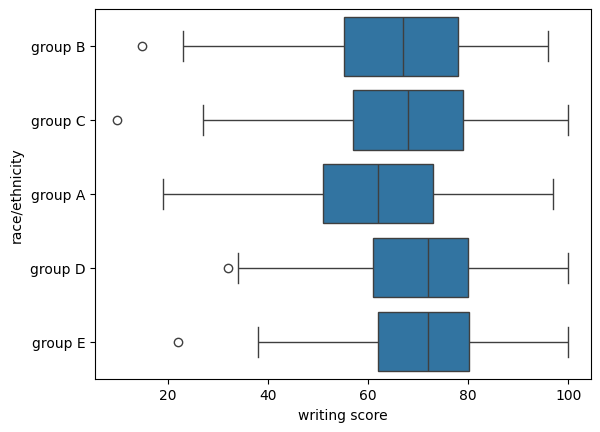

In [65]:
sns.boxplot(data=db, x='writing score', y='race/ethnicity')

### Análise pelo nivel de educação dos pais

<Axes: xlabel='math score', ylabel='parental level of education'>

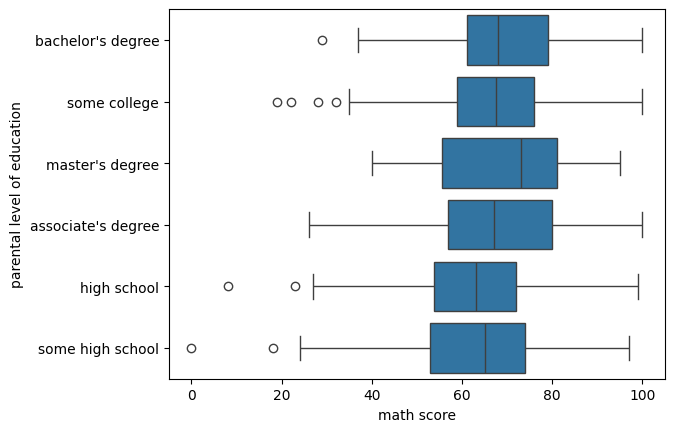

In [66]:
sns.boxplot(data=db, x='math score', y='parental level of education')

In [67]:
db.groupby(by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


<Axes: xlabel='reading score', ylabel='parental level of education'>

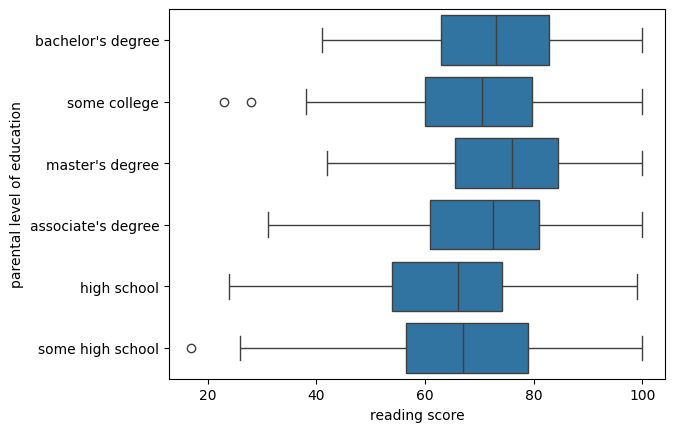

In [68]:
sns.boxplot(data=db, x='reading score', y='parental level of education')

In [69]:
db.groupby(by=['parental level of education']).describe()['reading score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
1,bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
2,high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
3,master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
4,some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
5,some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


<Axes: xlabel='writing score', ylabel='parental level of education'>

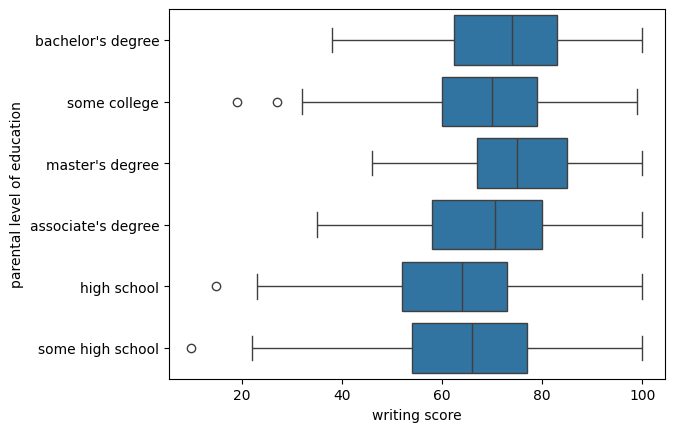

In [70]:
sns.boxplot(data=db, x='writing score', y='parental level of education')

In [71]:
db.groupby(by=['parental level of education']).describe()['writing score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
1,bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
2,high school,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
3,master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
4,some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
5,some high school,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0


Podemos notar que aqueles cujos pais possuem alguma graduação alcançaram melhores resultados nas provas.

### Análise de teste de preparação para a prova

<Axes: xlabel='math score', ylabel='test preparation course'>

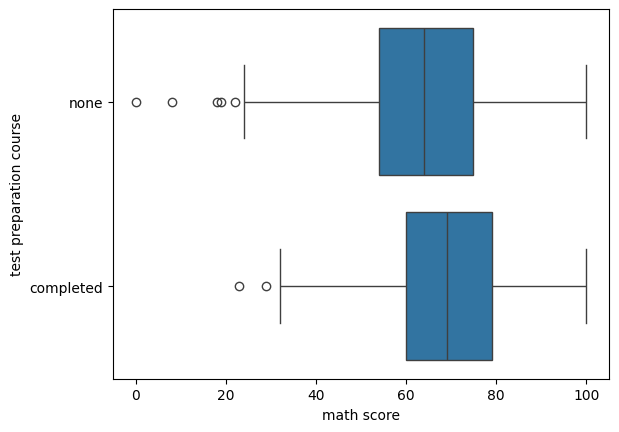

In [72]:
sns.boxplot(data=db, x='math score', y='test preparation course')

In [73]:
db.groupby(by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


<Axes: xlabel='reading score', ylabel='test preparation course'>

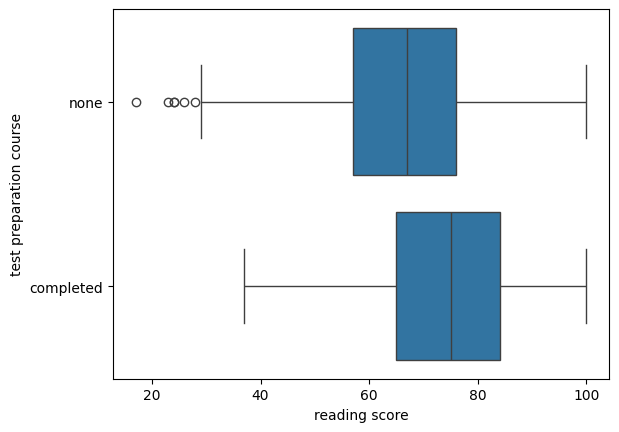

In [74]:
sns.boxplot(data=db, x='reading score', y='test preparation course')

In [75]:
db.groupby(by=['test preparation course']).describe()['reading score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
1,none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


<Axes: xlabel='writing score', ylabel='test preparation course'>

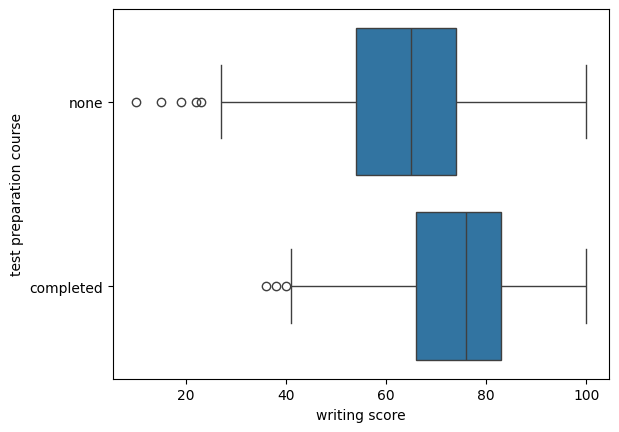

In [76]:
sns.boxplot(data=db, x='writing score', y='test preparation course')

In [77]:
db.groupby(by=['test preparation course']).describe()['writing score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
1,none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


É nítido que aqueles que fizeram o teste preparatório tiveram melhores notas nas provas.

### Análise sobre matéria

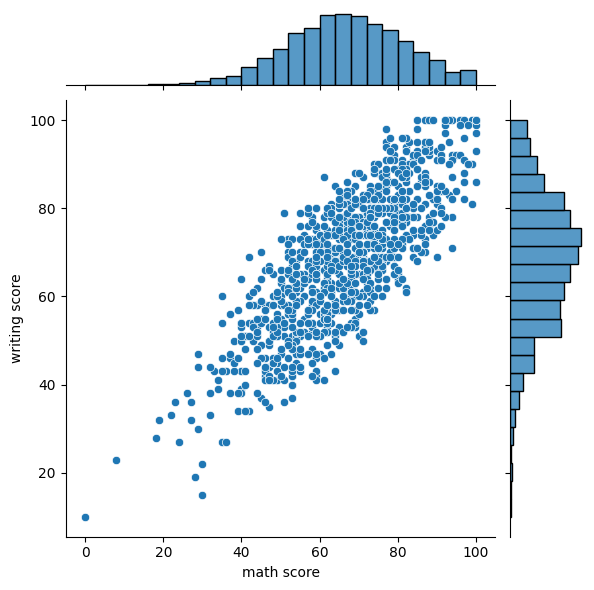

In [78]:
grafico = sns.JointGrid(data = db, x = 'math score', y = 'writing score')
grafico.plot(sns.scatterplot, sns.histplot);

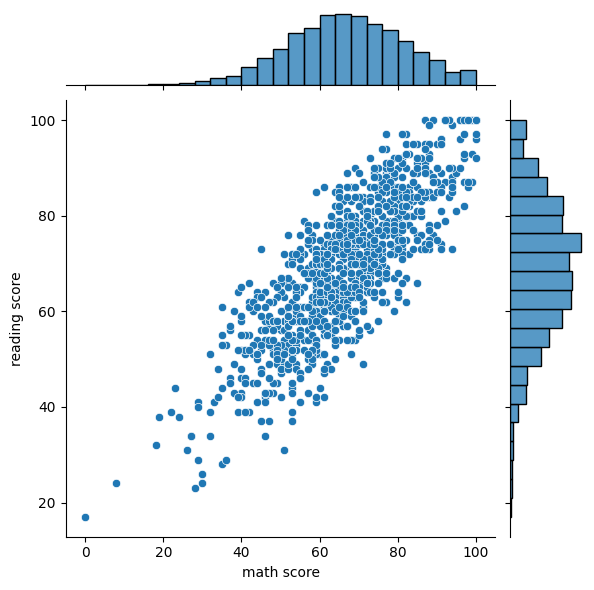

In [79]:
grafico = sns.JointGrid(data = db, x = 'math score', y = 'reading score')
grafico.plot(sns.scatterplot, sns.histplot);

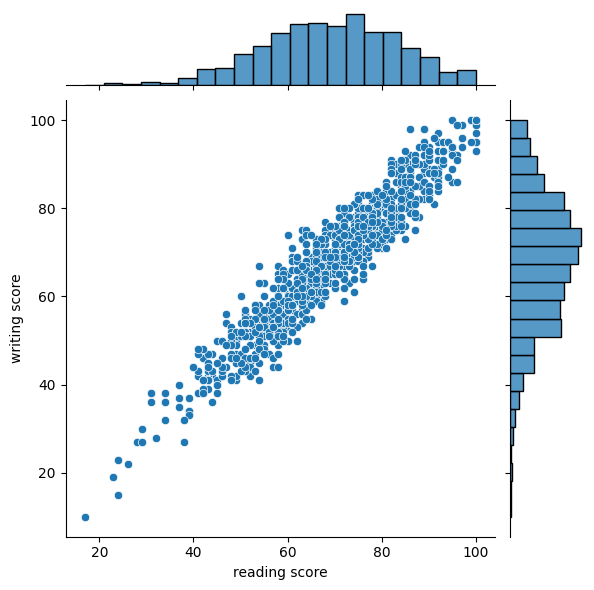

In [80]:
grafico = sns.JointGrid(data = db, x = 'reading score', y = 'writing score')
grafico.plot(sns.scatterplot, sns.histplot);

## Conclusão

Com esta análise extraímos insights bem relevantes como:
- A média da nota dos alunos com base no sexo.
- A relevância do grau de escolaridade dos pais para o resultado da nota dos filhos.
- A taxa de inclusão de cada raça/etnia na escola.
- A eficácia do teste preparatório.